In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [9]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [10]:
#df_events.columns

In [11]:
#df_events.head()


In [12]:
models = df_events.loc[df_events["storage"].isnull() == False,:]
models = models[["model","storage","event","color","condition"]]
models = models.loc[models["event"] == "conversion" ,:]
models.head()

,model,storage,event,color,condition
220,Motorola Moto X2,32GB,conversion,Couro Vintage,Muito Bom
2282,Samsung Galaxy Core Plus Duos TV,4GB,conversion,Branco,Muito Bom
2547,Samsung Galaxy S6 Flat,32GB,conversion,Branco,Muito Bom
4245,iPhone 5s,32GB,conversion,Cinza espacial,Bom
6985,Samsung Galaxy J5,16GB,conversion,Preto,Bom


In [13]:
models.count()

model        1172
storage      1172
event        1172
color        1172
condition    1172
dtype: int64

# Cantidad de compras para los distintos tipos de alamacenamiento interno

In [14]:
storage = models["storage"].value_counts()
storage.index = [16,32,64,8,128,4,256,0.512]
storage = storage.sort_index()
#storage.index = ["256GB","128GB","64GB","32GB","16GB","8GB","4GB","512MB"]
storage

0.512        1
4.000       17
8.000      102
16.000     552
32.000     265
64.000     205
128.000     27
256.000      3
Name: storage, dtype: int64

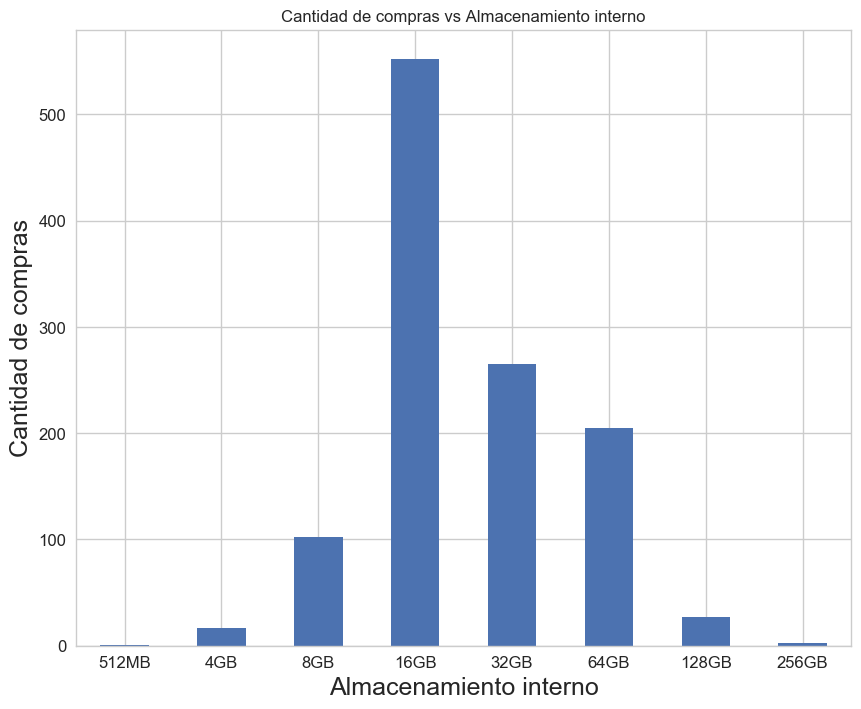

In [18]:
ax = storage.plot(kind = 'bar', title = "Cantidad de compras vs Almacenamiento interno",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Almacenamiento interno", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["512MB","4GB","8GB","16GB","32GB","64GB","128GB","256GB"], rotation = "horizontal")
plt.show()

# Modelos más comprados

In [19]:
model = models["model"].value_counts()
model = model.head(20)
model.head(20)

Samsung Galaxy J5                    88
iPhone 5s                            84
iPhone 6                             71
Samsung Galaxy S6 Flat               39
iPhone 6S                            37
iPhone 5c                            33
Motorola Moto G3 4G                  30
Motorola Moto G4 Plus                30
Samsung Galaxy J7                    28
Samsung Galaxy A5                    27
Samsung Galaxy Gran Prime Duos TV    24
Samsung Galaxy J7 Prime              20
Samsung Galaxy Note 4                19
Samsung Galaxy S5                    18
Samsung Galaxy S7                    18
Samsung Galaxy Gran Prime 3G Duos    18
Samsung Galaxy S3 Mini               17
Samsung Galaxy S7 Edge               17
Motorola Moto G2 3G Dual             17
iPhone SE                            17
Name: model, dtype: int64

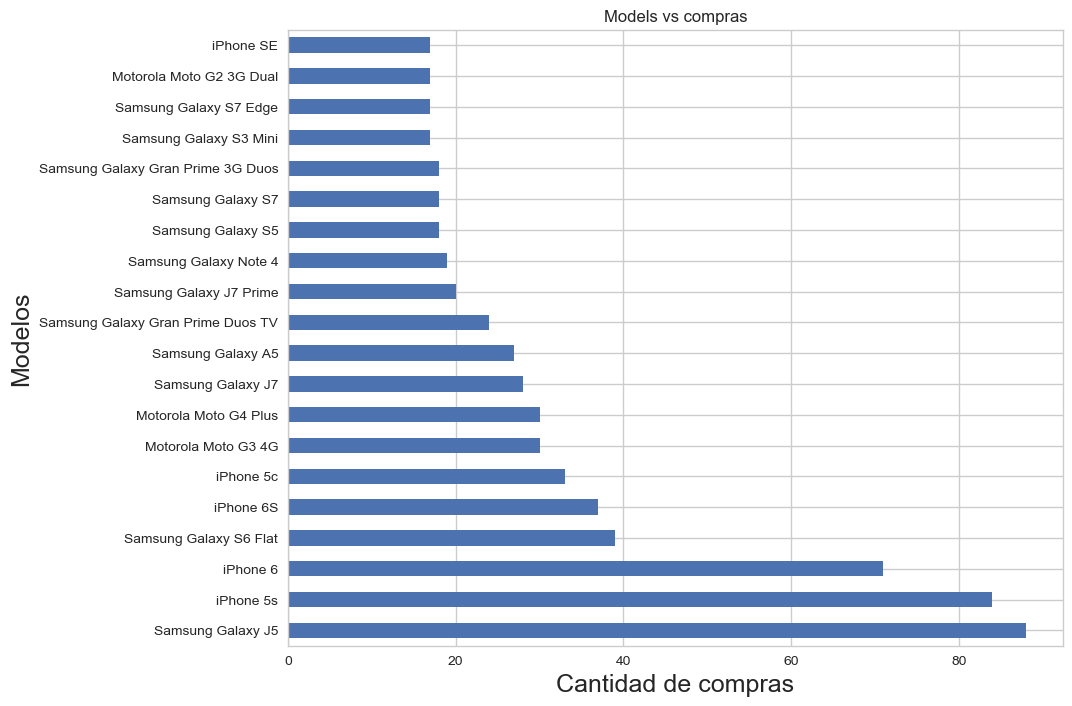

In [20]:
ax = model.plot(kind = 'barh', title = "Models vs compras",figsize =(10,8),legend = False, fontsize = 10)
ax.set_xlabel("Cantidad de compras",fontsize = 18)
ax.set_ylabel("Modelos",fontsize = 18)
plt.show()

# Distintos colores por cantidad de compras  

In [21]:
color = models["color"].value_counts()
color = color.head(30)
color

Preto              368
Dourado            269
Branco             216
Cinza espacial      89
Prateado            51
Ouro Rosa           32
Rosa                30
Cinza               23
Azul                22
Preto Vermelho      11
Prata                8
Platinum             7
Preto Matte          6
Branco Vermelho      6
Verde                5
Ouro                 4
Titânio              4
Ametista             4
Preto Brilhante      3
Indigo               3
Amarelo              2
Vermelho             2
Bambu                2
Cabernet             2
Preto Azul           1
Couro Vintage        1
Azul Topázio         1
Branco Verde         0
Branco Dourado       0
Branco Pink          0
Name: color, dtype: int64

colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Cinza espacial" : "Negro", "Branco": "Blanco", "Prateado" : "Plata", "Ouro Rosa" : "Rosa", "Prata" : "Plata", "Rosa" : "Rosa",
          "Preto Matte": "Negro", "Platinum" :"Plata", "Cinza" : "Plata", "Azul": "Azul", "Ametista": "Otros", "Ouro": "Dorado", "Preto Brilhante" : "Negro", "Vermelho": "Otros",
          "Bambu":"Otros","Preto Vermelho": "Negro","Titânio": "Otros", "Verde": "Otros", "Branco Vermelho" : "Blanco", "indigo": "Otros", "Amarelo": "Otros", "Cabernet": "Otros", 
          "Couro Vintage": "Otros", "Azul Topázio": "Azul"}



In [22]:
colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Branco" : "Blanco", "Cinza espacial" : "Negro", "Prateado" : "Plata", "Ouro Rosa" : "Rosa",
"Rosa": "Rosa", "Cinza" : "Plata", "Azul" : "Azul", "Preto Vermelho" : "Negro", "Prata" : "Plata", "Platinum" : "Plata", "Preto Matte" : "Negro",
"Branco Vermelho" : "Blanco", "Ouro" : "Dorado", "Titânio" : "Plata", "Ametista" : "Otros", "Preto Brillhante" : "Negro", "Indigo" : "Otros",
"Amarelo" : "Otros", "Vermelho" : "Otros", "Bambu" : "Otros", "Cabernet" : "Otros", "Preto Azul" : "Negro", "Couro Vintage" : "Otros", "Azul Topázio" : "Azul"}

models["in_color"] = models['color'].apply(lambda x: colores.get(x, 'Basura'))

models = models.loc[models['in_color'] != 'Basura']
colores = models['in_color'].value_counts()
colores


Negro     475
Dorado    273
Blanco    222
Plata      93
Rosa       62
Azul       23
Otros      16
Name: in_color, dtype: int64

In [28]:
#colores = {"Negro": color["Preto"] + color["Cinza espacial"] + color["Preto Matte"] + color["Preto Brilhante"] ,
#           "Plata": color["Prateado"] + color["Prata"] + color["Platinum"] + color["Cinza"] + color["Titânio"] ,
#           "Dorado": color["Ouro"] + color["Dourado"],
#            "Rosa": color["Ouro Rosa"] + color["Rosa"],
#           "Azul": color["Azul"], "Otros" : color["Ametista"] + color["Vermelho"] +  color["Bambu"] +  color["Preto Vermelho"] + color["Verde"]}
#colores

#plt.bar(range(len(colores)), list(colores.values()))
#plt.xticks(range(len(colores)), list(colores.keys()))
         

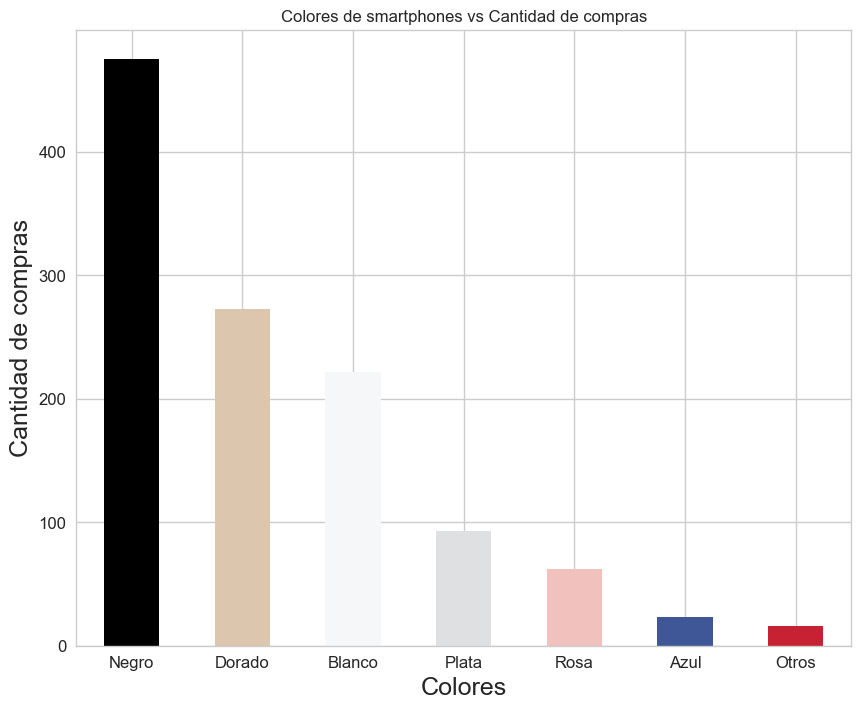

In [29]:
ax = colores.plot(kind = 'bar', title = "Colores de smartphones vs Cantidad de compras",figsize =(10,8),legend = False, rot=0, fontsize = 12,color = [["#000000","#DCC6AE","#F6F7F9","#DFE0E2","#F1C1BD" ,"#3F5796","#C72233"]])
ax.set_xlabel("Colores",fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
#ax.set_xticklabels(ax.getaxis.rotation = "horizontal")


plt.show()

## No se puede ver el color sefun pais, debido que no hay datos del mismo

models = df_events.loc[df_events["color"].isnull() == False,:]
models = models[["model","storage","event","color",'country']]
models = models.loc[models["event"] == "checkout" ,:]
models.head()

models2 = models.loc[models['country'].isnull() == False,:]
models2
models.count()

In [30]:
condition = models["condition"].value_counts()
condition

Bom                   532
Muito Bom             351
Excelente             257
Bom - Sem Touch ID     22
Novo                    2
Name: condition, dtype: int64

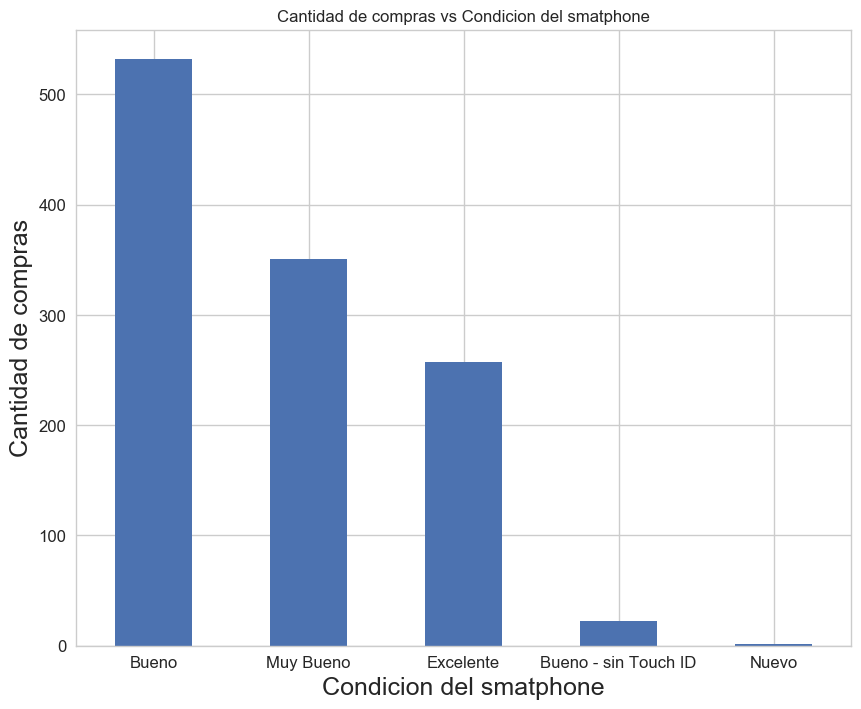

In [31]:
ax = condition.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Condicion del smatphone", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["Bueno","Muy Bueno","Excelente","Bueno - sin Touch ID","Nuevo"],rotation = "horizontal")
plt.show()